<a href="https://colab.research.google.com/github/mohmaed7777/Support-Vector-Machine-with-sklearn/blob/main/SVM_for_Wine_Quality_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
pd.plotting.register_matplotlib_converters()
import sklearn
print('Setup Complete!')

Setup Complete!


In [43]:
wine_data = '/content/RcYG8M5XQICGBvDOV4CAsQ_bf36d9e4cbbf4d5cbb2528b965b4fef4_Wine_Quality_Data.csv'
df = pd.read_csv(wine_data, sep=',')
df.head()

fixed_acidity  volatile_acidity  citric_acid  ...  alcohol  quality  color
0            7.4              0.70         0.00  ...      9.4        5    red
1            7.8              0.88         0.00  ...      9.8        5    red
2            7.8              0.76         0.04  ...      9.8        5    red
3           11.2              0.28         0.56  ...      9.8        6    red
4            7.4              0.70         0.00  ...      9.4        5    red

[5 rows x 13 columns]

In [44]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

Text(0.5, 0, 'color')

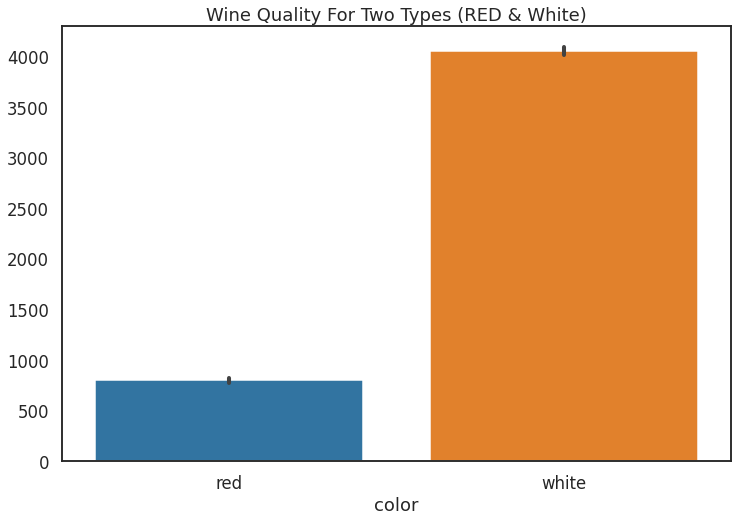

In [45]:
plt.figure(figsize=(12, 8))
plt.title('Wine Quality For Two Types (RED & White)')
sns.barplot(x=df['color'] ,y=df.index )
plt.xlabel('color')

In [46]:
y = (df['color']== 'red').astype(int)
filds = list(df.columns[:-1])
correlation = df[filds].corrwith(y)
correlation.sort_values(inplace=True)
correlation

total_sulfur_dioxide   -0.700357
free_sulfur_dioxide    -0.471644
residual_sugar         -0.348821
citric_acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
dtype: float64

In [47]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: color, Length: 6497, dtype: int64

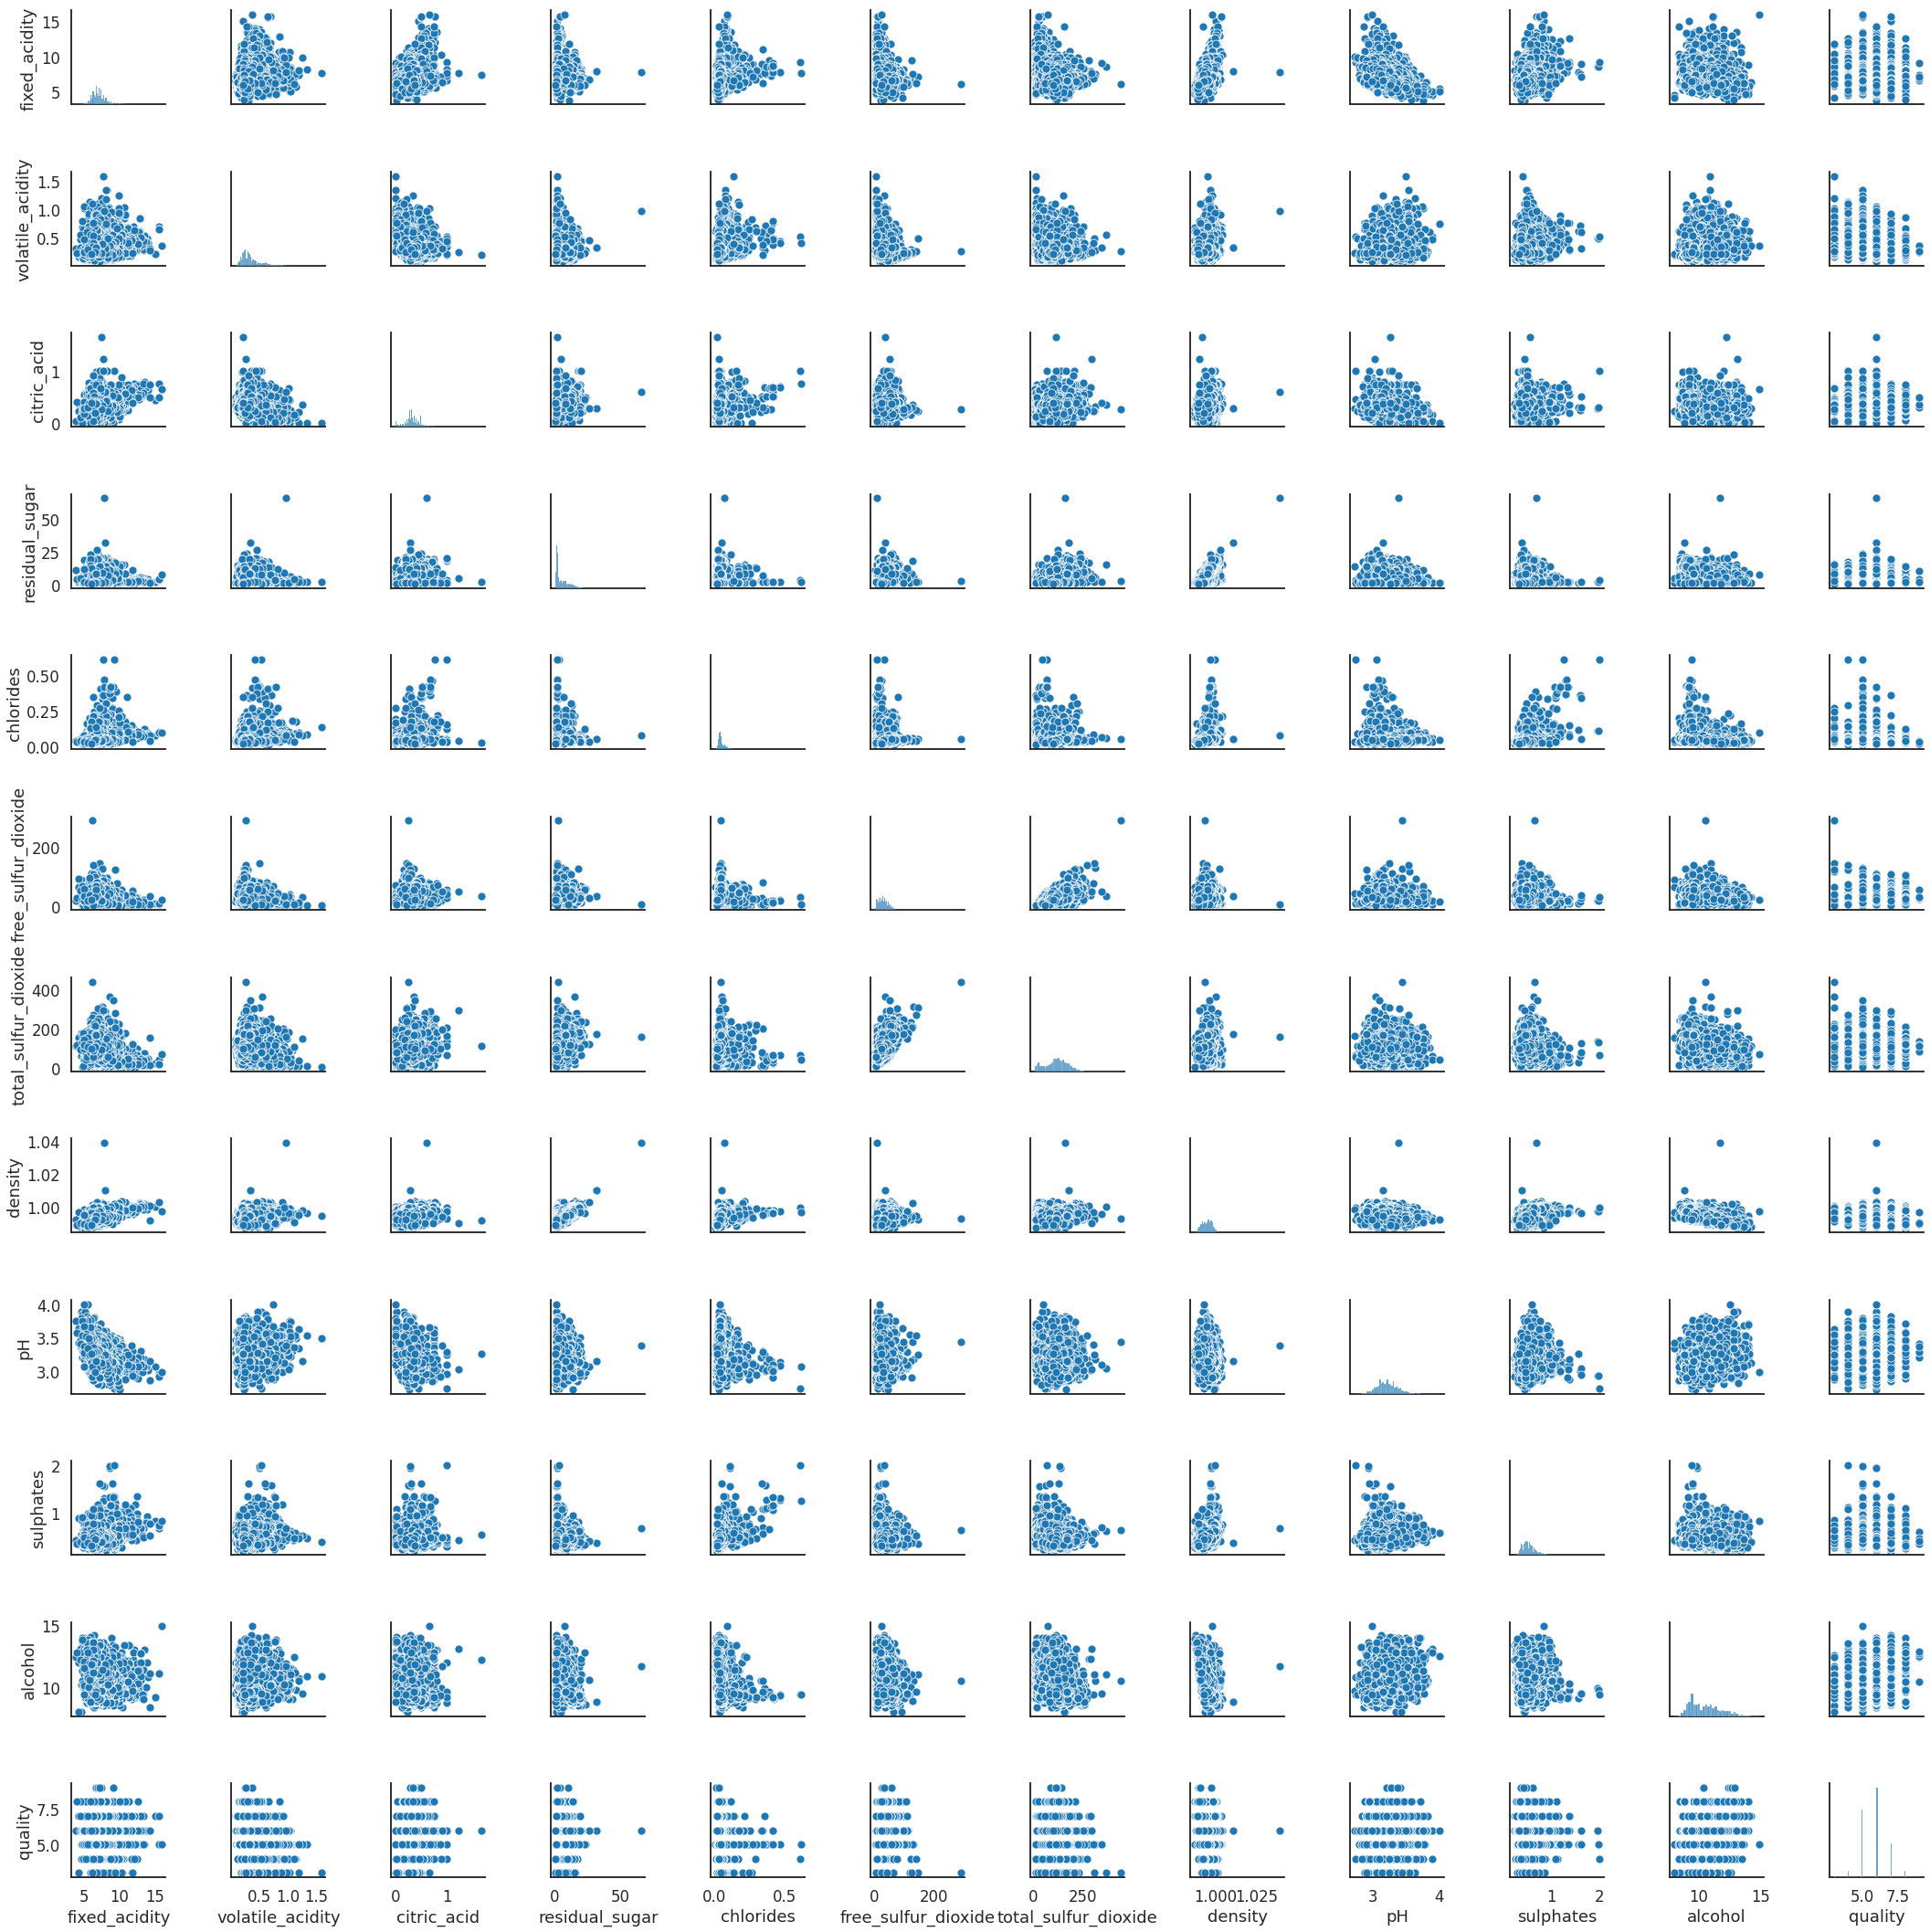

In [28]:
# Create a pairplot :
sns.set_context('talk')
#sns.set_palette('palette')
sns.set_style('white')
sns.pairplot(df)


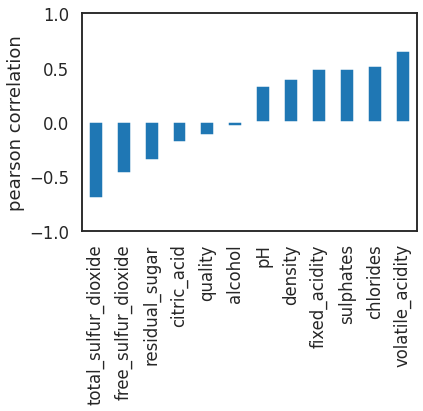

In [48]:
# Create a barplot showing the correlation between each column and Y: 
ax = correlation.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [49]:
# Scale the highist correlated Values : 
from sklearn.preprocessing import MinMaxScaler
fields = correlation.map(abs).sort_values().iloc[-2:].index
print(fields)
x = df[fields]
scalar = MinMaxScaler()
x = scalar.fit_transform(x)
x = pd.DataFrame(x , columns=['%s_scaled' % fld for fld in fields])
print(x.columns)

Index(['volatile_acidity', 'total_sulfur_dioxide'], dtype='object')
Index(['volatile_acidity_scaled', 'total_sulfur_dioxide_scaled'], dtype='object')


In [50]:
x

volatile_acidity_scaled  total_sulfur_dioxide_scaled
0                    0.413333                     0.064516
1                    0.533333                     0.140553
2                    0.453333                     0.110599
3                    0.133333                     0.124424
4                    0.413333                     0.064516
...                       ...                          ...
6492                 0.086667                     0.198157
6493                 0.160000                     0.373272
6494                 0.106667                     0.241935
6495                 0.140000                     0.239631
6496                 0.086667                     0.211982

[6497 rows x 2 columns]

**Linear Decision Boundary:**

In [51]:
from sklearn.svm import LinearSVC

In [52]:
Lsvc = LinearSVC()

In [53]:
Lsvc.fit(x, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

ValueError: ignored

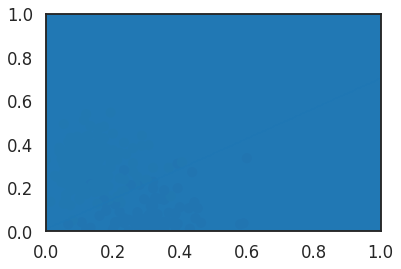

In [54]:
x_color = x.sample(300, random_state=45)
y_color = y.loc[x_color.index]
y_color = y_color.map(lambda r:'red' if r == 1 else 'yellow')
ax = plt.axes()
ax.scatter(x_color.iloc[:,0], x_color.iloc[:,1], color=y_color, alpha=1)

x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
x_grid = pd.DataFrame([xx_ravel, yy_ravel]).T 
y_grid_predictions = Lsvc.predict(x_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=3)
ax.set(x_label = fields[0],
       y_label= fields[1],
       xlim = [0,1],
       ylim=[0,1],
       title = 'Desision Boundray for Linear SVC')
